In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
train = pd.read_csv('data/Train.csv')
valid = pd.read_csv('data/Valid.csv')
test = pd.read_csv('data/Test.csv')

In [3]:
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


Two noticeable columns can be seen after reading the csv file that contains 40k movie reviews from IMDB.
One is the TEXT, which contains the review, and the other is the LABEL, which is composed of Os and 1s, with 0 meaning a negative review and 1 meaning a positive one.

In [4]:
train.shape

(40000, 2)

In [5]:
data = pd.concat([train, valid, test], ignore_index = True, axis=0)

In [6]:
data.shape

(50000, 2)

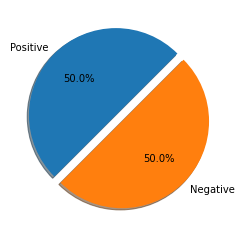

In [7]:
pos = data[data['label'] == 1]
neg = data[data['label'] == 0]

emo = [pos['label'].count(),neg['label'].count()]

legpie = plt.pie(emo,labels=["Positive","Negative"],
                  autopct ='%1.1f%%',
                  shadow = True,
                  startangle = 45,
                  explode=(0, 0.1))

Next, we'll import the Regular Expression Operation library, which we'll use to remove html tags like " a >" or. Therefore, whenever we encounter these tags, we replace them with the string ""
Next, we'll modify emoticons like the smiley:), sad face:), and even some upset face:/.
To acquire a set of clear text, we'll move the emojis to the conclusion of the sentence.

In [8]:
import re
def preprocessor(text):
    sentence = text
    sentence = re.sub('<[^>]*>','', sentence)
    sentence = re.sub(r'\d', '', sentence)
    emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', sentence)
    sentence = re.sub('[\W]+',' ', sentence.lower()) +' '.join(emojis).replace('-','')
    return sentence   

To clarify what precisely occurs when the preprocessing function is invoked, let's call it, provide it some text, and then look at the results.

In [9]:
data['text']= data['text'].apply(preprocessor)

A new library called PorterStemmer is being imported from nltk.stem.porter. It uses an algorithm for suffix stripping, returning the word to its original meaning. For example, eating will become eating and running will become running. This will help our text data become more straightforward and eliminate any pointless complexity.

In [10]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()

Therefore, it is necessary to break down the sentences into words before stemming. Once more, examples will help you comprehend the concept of text splitting.

In [11]:
def tokenizer(sentence):
    return sentence.split()

In [12]:
def tokenizer_porter(sentence):
    return [porter.stem(word) for word in sentence.split()]

Let's examine what the tokenizer function does with the text that we passed it.

In [13]:
tokenizer("Haters love Hating as they Hate")

['Haters', 'love', 'Hating', 'as', 'they', 'Hate']

The words in the following example are being broken down to their most basic forms. Haters will become haters, and hating will become hate.

In [14]:
tokenizer_porter("Haters love Hating as they Hate")

['hater', 'love', 'hate', 'as', 'they', 'hate']

The majority of words in any natural language are stopwords. These stopwords might not significantly contribute to the meaning of the content when used in text data analysis and NLP model construction. The most frequent terms in a text are typically "the," "is," "in," "for," "where," "when," "to," and "at," among others.

In [15]:
from nltk.corpus import stopwords

stop=stopwords.words('english')

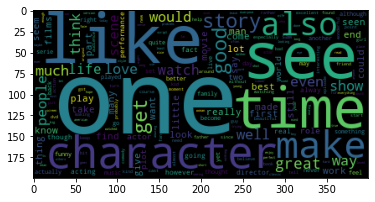

In [16]:
from wordcloud import WordCloud

pos_rev = data[data['label'] == 1]
pos_rev = pos_rev['text']
neg_rev = data[data['label'] == 0]
neg_rev = neg_rev['text']

pos_words = ' '.join(pos_rev)

pos_clean_word = " ".join([pos_words for pos_words in pos_words.split()
                          if(pos_words!='movie' and pos_words!='film')
                         ])  
                  
pos_wordcloud = WordCloud(stopwords=stop).generate(pos_clean_word)
plt.imshow(pos_wordcloud)
plt.show()

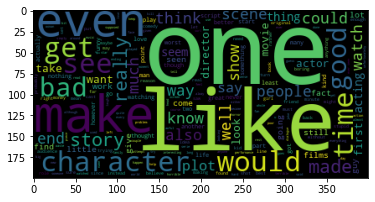

In [17]:
neg_words = ' '.join(neg_rev)
neg_clean_word = " ".join([neg_words for neg_words in neg_words.split()
                          if(neg_words!='movie' and neg_words!='film')
                           ])
neg_wordcloud = WordCloud(stopwords=stop).generate(neg_clean_word)
plt.imshow(neg_wordcloud)
plt.show()

The words "love," "great," "perfect," "good," "beautiful," "lovely," and "excellent" are highlighted.

The following derogatory terms are highlighted: awful, waste, trouble, foolish, horrific, bad, and poor.

Unexpectedly, both reviews share the letter "ONE." I suppose positive reviews may say something like, "One of the best characters/movies/films I've seen," while negative reviews might say, "I rate this movie one star or one of the worst directions/scripts, etc.

<AxesSubplot:ylabel='Count'>

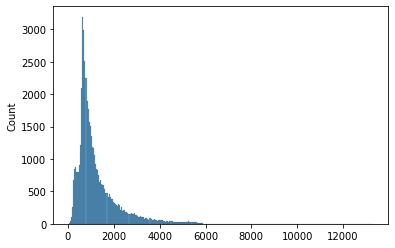

In [18]:
#right-skewed distribution
import seaborn as sns
data_len = [len(l) for l in data['text']]
sns.histplot(data, x = data_len)

In [19]:
pos_words = ' '.join(pos_rev)
pos_clean_word = [pos_words for pos_words in pos_words.split()
                 if(pos_words!='movie' and pos_words!='film')]
pos_clean_word = [w.lower() for w in pos_clean_word if not w in stop]
pos_clean_word = [porter.stem(p) for p in pos_clean_word]
pos_clean_word

['im',
 'die',
 'hard',
 'dad',
 'armi',
 'fan',
 'noth',
 'ever',
 'chang',
 'got',
 'tape',
 'dvd',
 'audiobook',
 'everi',
 'time',
 'watch',
 'listen',
 'brand',
 'new',
 'run',
 'certain',
 'episod',
 'man',
 'hour',
 'enemi',
 'within',
 'gate',
 'battl',
 'school',
 'numer',
 'other',
 'differ',
 'edg',
 'introduct',
 'new',
 'gener',
 'instead',
 'captain',
 'squar',
 'brilliant',
 'move',
 'especi',
 'cash',
 'chequ',
 'someth',
 'rare',
 'done',
 'follow',
 'earli',
 'year',
 'get',
 'equip',
 'uniform',
 'start',
 'train',
 'great',
 'bore',
 'sunday',
 'afternoon',
 'two',
 'draw',
 'back',
 'one',
 'german',
 'bogu',
 'dodgi',
 'accent',
 'come',
 'one',
 'german',
 'cant',
 'pronounc',
 'letter',
 'w',
 'like',
 'us',
 'two',
 'cast',
 'liz',
 'frazer',
 'instead',
 'familiar',
 'janet',
 'davi',
 'like',
 'liz',
 'film',
 'like',
 'carri',
 'on',
 'carri',
 'correctli',
 'janet',
 'davi',
 'would',
 'better',
 'choic',
 'final',
 'watch',
 'shock',
 'last',
 'night',
 'd

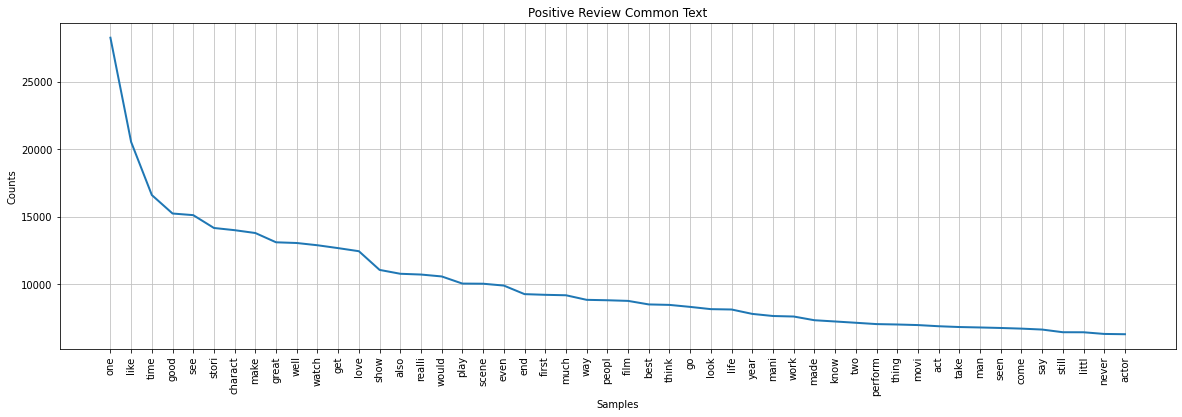

In [20]:
from nltk.probability import FreqDist

pos_freq = FreqDist(pos_clean_word)
plt.figure(figsize=(20,6))
pos_freq.plot(50,cumulative=False,title='Positive Review Common Text')
plt.show()

In [21]:
neg_words = ' '.join(neg_rev)
neg_clean_word = [neg_words for neg_words in neg_words.split()
                 if(neg_words!='movie' and neg_words!='film')]
neg_clean_word = [w.lower() for w in neg_clean_word if not w in stop]
neg_clean_word = [porter.stem(p) for p in neg_clean_word]
neg_clean_word

['grew',
 'b',
 'watch',
 'love',
 'thunderbird',
 'mate',
 'school',
 'watch',
 'play',
 'thunderbird',
 'school',
 'lunch',
 'school',
 'want',
 'virgil',
 'scott',
 'one',
 'want',
 'alan',
 'count',
 'becam',
 'art',
 'form',
 'took',
 'children',
 'see',
 'hope',
 'would',
 'get',
 'glimps',
 'love',
 'child',
 'bitterli',
 'disappoint',
 'high',
 'point',
 'snappi',
 'theme',
 'tune',
 'could',
 'compar',
 'origin',
 'score',
 'thunderbird',
 'thank',
 'earli',
 'saturday',
 'morn',
 'one',
 'televis',
 'channel',
 'still',
 'play',
 'rerun',
 'seri',
 'gerri',
 'anderson',
 'wife',
 'creat',
 'jonatha',
 'frake',
 'hand',
 'director',
 'chair',
 'version',
 'complet',
 'hopeless',
 'wast',
 'utter',
 'rubbish',
 'cgi',
 'remak',
 'may',
 'accept',
 'replac',
 'marionett',
 'homo',
 'sapien',
 'subsp',
 'sapien',
 'huge',
 'error',
 'judgment',
 'put',
 'dvd',
 'player',
 'sat',
 'coke',
 'chip',
 'expect',
 'hope',
 'would',
 'contain',
 'strong',
 'point',
 'first',
 'awsom',
 

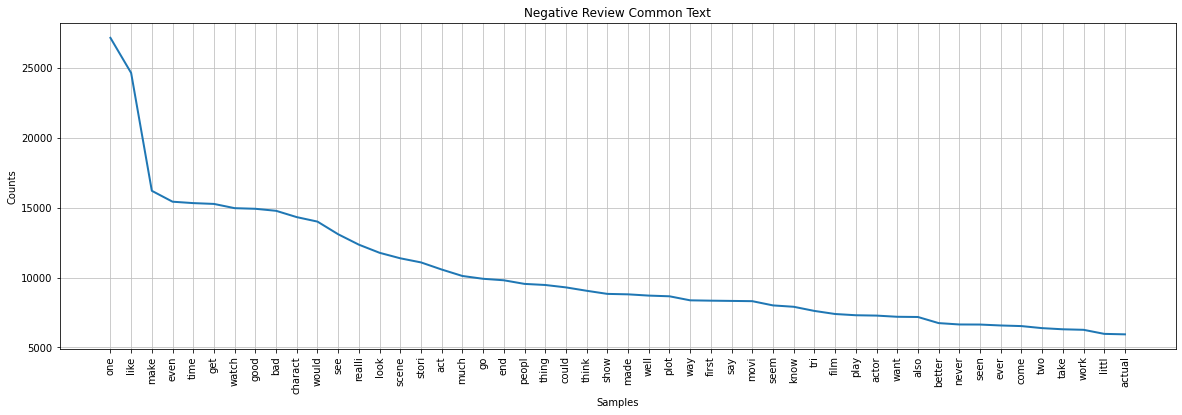

In [22]:
from nltk.probability import FreqDist

neg_freq = FreqDist(neg_clean_word)
plt.figure(figsize=(20,6))
neg_freq.plot(50,cumulative=False,title='Negative Review Common Text')
plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = data['text']
y = data['label']
y=y.astype('int')
X = tfidf.fit_transform(X)

In [24]:
X[5]

<1x102089 sparse matrix of type '<class 'numpy.float64'>'
	with 72 stored elements in Compressed Sparse Row format>

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_reg=LogisticRegression().fit(X_train, y_train)

In [49]:
train_score=round(log_reg.score(X_train, y_train),2)*100
test_score=round(log_reg.score(X_test, y_test),2)*100
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      5035
           1       0.89      0.90      0.89      4965

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



PRECISION = 1.0 if false positive is none. RECALL = 1.0 if false negative is none.
F1-SCORE is a combination of precision and recall.
SUPPORT is the number of samples for the metric was calculated on.

In [50]:
print(confusion_matrix(y_test, y_pred)/len(y_test))

[[0.4482 0.0553]
 [0.0503 0.4462]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

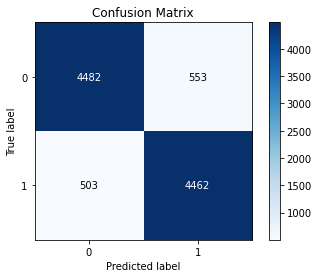

In [51]:
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(y_test,y_pred)

### Decision Trees

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier().fit(X_train, y_train)
Y_pred=dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      5035
           1       0.89      0.90      0.89      4965

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [53]:
print(confusion_matrix(y_test, y_pred)/len(y_test))

[[0.4482 0.0553]
 [0.0503 0.4462]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

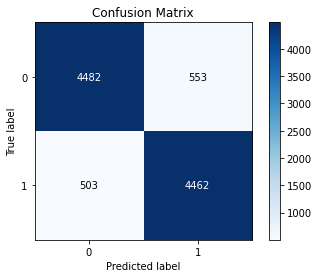

In [54]:
plot_confusion_matrix(y_test,y_pred)

### K-Nearest Neighbour

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier().fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      5035
           1       0.77      0.80      0.78      4965

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



In [56]:
print(confusion_matrix(y_test, y_pred)/len(y_test))

[[0.3823 0.1212]
 [0.1003 0.3962]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

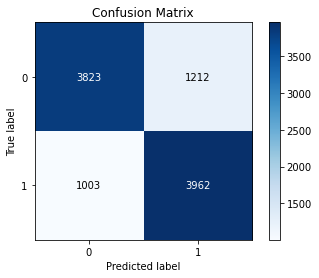

In [57]:
plot_confusion_matrix(y_test,y_pred)